# t-Tests and Two Sample Tests

> In this lab, we will take a close look at t-tests and two samples tests, in order to get an idea for how they can be applied to real data.

> What is a t-test, and when do we use it? A t-test is used to compare the means of one or two samples, when the underlying population parameters of those samples (mean and standard deviation) are unknown. Like a z-test, the t-test assumes that the sample follows a normal distribution. In particular, this test is useful for when we have a small sample size, as we can not use the Central Limit Theorem to use a z-test.
>
> There are two kinds of t-tests:
> 1. One Sample t-tests
> 2. Two Sample t-tests
>
> We will go through both in this exercise. 
> 
> Before we test anything, we will need some data. In particular, some normal data. Let $\mu_{True}=10$ and $\sigma_{True}=3$ for the underlying normal population, then use the `rnorm()` function with your selected parameters to generate 20 samples from that particular normal distribution. Your final code will look something like `rnorm(20, mean=10, sd=3)`. If you want your code to be reproducable, make sure to set a seed as well using `set.seed()`.

In [6]:
# Load necessary library
set.seed(42)

# Generate a random sample dataset
sample_data <- rnorm(30, mean=50, sd=10)

# Display first few data points
head(sample_data)

[1] 63.70958 44.35302 53.63128 56.32863 54.04268 48.93875

> Now imagine that you where just given this data, without knowing the underlying parameters. How would you go about estimating the true mean of the population from the sample? We would need to do some hypothesis testing.
>
> Let's start with a "reasonable" hypothesis that $\mu = 10$ (we know this is true, but suppose you don't for the sake of the test) and an alternate hypothesis that $\mu \ne 10$. To test this, we need to think about certian attributes of our sample:
> 1. Is the sample size "large" (n>30)? No, the sample size is n=20.
> 2. Do we know any of the underlying parameters? No, the true mean and standard deviation are unknown.
> 3. Is the sample approximately normally distributed? Hmm, let's check. Use the `hist()` function to plot your samples and check if they follow an approximately normal distribution.

In [7]:
# One-sample t-test
# Test if the mean of sample_data is significantly different from 50

t_test_result <- t.test(sample_data, mu=50)
print(t_test_result)


	One Sample t-test

data:  sample_data
t = 0.29933, df = 29, p-value = 0.7668
alternative hypothesis: true mean is not equal to 50
95 percent confidence interval:
 45.99952 55.37222
sample estimates:
mean of x 
 50.68587 



> From there, we can see that we should use a t-test. To calculate a t-statistic from our data, it's just plugging values into the formula:
>
> $$ \text{t-stat} = \frac{\bar{x}-\mu_0}{s/\sqrt{n}} $$
>
> where $\bar{x}$ is the sample mean, $\mu_0$ is the true mean when assuming that the null is correct, $s$ is the sample standard deviation, and $n$ is the sample size. Then our t-statistic will follow a Student's t-distribution, which we can use to determine the probability of observing our data, given the null hypothesis. Use the `mean()` and `sd()` functions on your samples to solve for these values, and then calculate the t-statistic for your data.

In [8]:
# Generate two independent sample datasets
set.seed(42)
sample1 <- rnorm(30, mean=55, sd=10)
sample2 <- rnorm(30, mean=50, sd=10)

# Perform an independent (unpaired) two-sample t-test
t_test_result <- t.test(sample1, sample2, var.equal=FALSE)  # Welch's t-test

print(t_test_result)


	Welch Two Sample t-test

data:  sample1 and sample2
t = 2.3112, df = 56.249, p-value = 0.02451
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  0.920669 12.889238
sample estimates:
mean of x mean of y 
 55.68587  48.78091 



> We have a test statistic, now we want to determine how likely it was that we observed our test statistic. We can calculate this with a p-value, just as we did with a z-test. However, there is an extra step with a t-test. 
> 
> The Student's t-distribution has a "Degrees of Freedom" parameter (typically annotated as $\nu$) which affects the spread of data values of the underlying distribution. The higher the degree of freedom, the less spread that will be observed. This parameter is based on the number of samples observed. 
> 
> Before we apply this to our sample, let's take a quick theoretical detour to see how different degrees of freedom affect the different shapes. Execute the cell below to plot the PDFs for different t-distributions, where the only difference is the degrees of freedom.

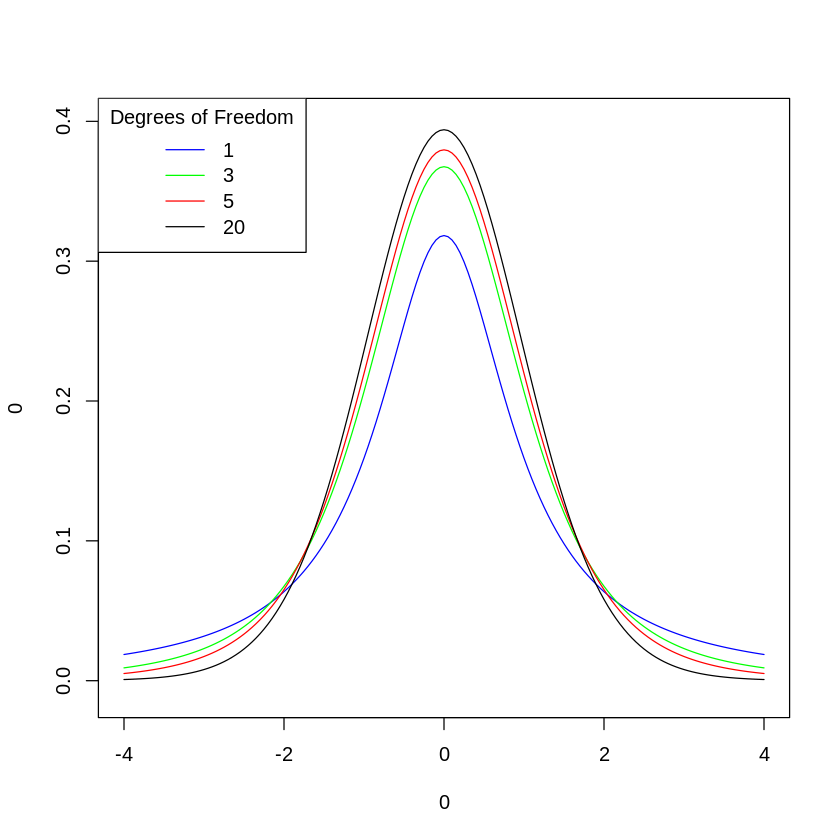

In [1]:
x = seq(-4, 4, 0.05)

y.1 = dt(x, 1)
y.3 = dt(x, 3)
y.5 = dt(x, 5)
y.20 = dt(x, 20)

plot(0,0,xlim = c(-4,4),ylim = c(-0.01, 0.4),type = "n")
lines(x, y.1, col="blue")
lines(x, y.3, col="green")
lines(x, y.5, col="red")
lines(x, y.20, col="black")
legend("topleft", legend=c(1,3,5,20), col=c("blue", "green", "red", "black"), lty=c(1,1), title="Degrees of Freedom")

> For a one sample t-test, the degrees of freedom is calculated as $\nu = n-1$. So, for our data, we get $\nu = 20 - 1 = 19$ degrees of freedom.
>
> One of the ways to check the . Since we're using a two-tailed test (because our alternative hypothesis is $\mu_0 \ne 10$), we need to calculate the probability that the true mean is significantly above or below the observed data. We can solve this using the equation: $\text{p-value}= 2 F_t(-|t|, dof=n-1)$. Note that $F_t$ is the CDF of the t-distribution, which we can calculate in R using the `pt()` function, and that $t$ is the test statistic we calculated earlier.
>
> Putting those all together, we can calculate the p-value using similar to `2*pt(-abs(test.stat), df=n-1)`.

In [12]:
# Paired t-test example
# Generate paired samples before and after treatment
set.seed(42)
before <- rnorm(30, mean=100, sd=15)
after <- before + rnorm(30, mean=5, sd=5)  # Adding small change

# Perform a paired t-test
t_test_result <- t.test(before, after, paired=TRUE)

print(t_test_result)


	Paired t-test

data:  before and after
t = -4.5802, df = 29, p-value = 8.133e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.350945 -2.429970
sample estimates:
mean of the differences 
              -4.390457 



> Our null hypothesis was that $\mu=10$. Based on your results, and at a significance level of $\alpha=0.1$, does your data support or reject that null hypothesis?
>
> Using the same data, try testing some "unreasonable" guess at the true mean, such as $\mu=100$. Does the test correctly reject the mean?

In [11]:
# Checking assumptions: Normality test using Shapiro-Wilk test
shapiro_test <- shapiro.test(sample_data)

print(shapiro_test)


	Shapiro-Wilk normality test

data:  sample_data
W = 0.96209, p-value = 0.35



> The other use for t-tests are when you want to compare the mean of two different samples. This is a Two Sample t-Test.
>
> Let your original sample be Sample A. Create a second sample (Sample B) that specifically has the *same* mean $\mu_B=10$ but a *different* standard deviation. Have 15 observations in Sample B.

In [17]:
# Set seed for reproducibility
set.seed(42)

# Generate Sample B with mean 10 and a different standard deviation (e.g., 5)
sample_B <- rnorm(15, mean=10, sd=5)

# Print Sample B to confirm
print(sample_B)


 [1] 16.854792  7.176509 11.815642 13.164313 12.021342  9.469377 17.557610
 [8]  9.526705 20.092119  9.686430 16.524348 21.433227  3.055696  8.606056
[15]  9.333393


In [22]:
print(sample_A)
print(sample_B)


 [1] 54.32818 41.88607 64.44101 45.68554 56.55648 53.21925 42.16161 65.75728
 [9] 56.42899 50.89761 52.76551 56.79289 50.89833 20.06910 52.84883 46.32765
[17] 51.85231 55.81824 63.99737 42.72708 63.02543 53.35848 60.38506 59.20729
[25] 57.20878 39.56881 49.09814 56.23518 40.46477 44.57171
 [1] 16.854792  7.176509 11.815642 13.164313 12.021342  9.469377 17.557610
 [8]  9.526705 20.092119  9.686430 16.524348 21.433227  3.055696  8.606056
[15]  9.333393


In [24]:
set.seed(42)  # Ensure reproducibility
sample_A <- rnorm(30, mean=50, sd=10)  # Sample A with mean=50, SD=10, 30 observations


In [25]:
t_test_result <- t.test(sample_A, sample_B, var.equal=FALSE)
print(t_test_result)



	Welch Two Sample t-test

data:  sample_A and sample_B
t = 14.46, df = 41.915, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 32.9242 43.6052
sample estimates:
mean of x mean of y 
 50.68587  12.42117 



In [26]:
# Ensure samples exist
if (!exists("sample_A")) {
    sample_A <- rnorm(30, mean=50, sd=10)
}
if (!exists("sample_B")) {
    sample_B <- rnorm(15, mean=10, sd=5)
}

# Remove NA values if any
sample_A <- na.omit(sample_A)
sample_B <- na.omit(sample_B)

# Convert to numeric in case of type issues
sample_A <- as.numeric(sample_A)
sample_B <- as.numeric(sample_B)

# Perform two-sample t-test
t_test_result <- t.test(sample_A, sample_B, var.equal=FALSE)

# Print result
print(t_test_result)



	Welch Two Sample t-test

data:  sample_A and sample_B
t = 14.46, df = 41.915, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 32.9242 43.6052
sample estimates:
mean of x mean of y 
 50.68587  12.42117 



> Let's test whether the two samples have the same underlying mean. In particular, we have the null hypothesis that $\mu_A - \mu_B = 0$ and the alternative hypothesis that $\mu_A - \mu_B \ne 0$.
>
> To test this, we can calculate a test statistic that will follow the t-distribution using the equation:
>
> $$\text{t-stat}=\frac{\bar{X}_A - \bar{X}_B}{\sqrt{s_A^2/n_A + s_B^2/n_B}}$$
>
> Another difference from the One Sample test is the degrees of freedom, as it's based on both samples. For the Two Sample Test, we have $\nu = n_A + n_B - 2$.
> 
> Once we have our test statistic and degrees of freedom, we can calculate the p-value in the same was as we did for the One Sample t-test. Use the same functions as you did in the One Sample test to solve for this p-value. What are the results from the test at a significance level of $\alpha=0.1$?

In [33]:
# Ensure reproducibility
set.seed(42)

# Generate Sample A and Sample B
sample_A <- rnorm(30, mean=50, sd=10)  # Sample A: 30 observations, mean=50, sd=10
sample_B <- rnorm(15, mean=10, sd=5)   # Sample B: 15 observations, mean=10, sd=5

# Print the first few values of each sample to verify
print(head(sample_A))
print(head(sample_B))


[1] 63.70958 44.35302 53.63128 56.32863 54.04268 48.93875
[1] 12.277251 13.524187 15.175518  6.955368 12.524776  1.414957


In [34]:
# Calculate sample means
mean_A <- mean(sample_A)
mean_B <- mean(sample_B)

# Calculate sample standard deviations
sd_A <- sd(sample_A)
sd_B <- sd(sample_B)

# Sample sizes
n_A <- length(sample_A)
n_B <- length(sample_B)

# Compute t-statistic
t_stat <- (mean_A - mean_B) / sqrt((sd_A^2 / n_A) + (sd_B^2 / n_B))

# Print the t-statistic
print(paste("T-Statistic:", t_stat))


[1] "T-Statistic: 16.132411536656"


In [35]:
df <- n_A + n_B - 2
print(paste("Degrees of Freedom:", df))


[1] "Degrees of Freedom: 43"


In [36]:
# Compute the two-tailed p-value
p_value <- 2 * pt(-abs(t_stat), df=df)

# Print the p-value
print(paste("P-Value:", p_value))


[1] "P-Value: 7.49918880257324e-20"


In [37]:
alpha <- 0.1  # Significance level

if (p_value < alpha) {
    print("Reject the Null Hypothesis: The means are significantly different.")
} else {
    print("Fail to Reject the Null Hypothesis: No significant difference in means.")
}


[1] "Reject the Null Hypothesis: The means are significantly different."


In [38]:
t_test_result <- t.test(sample_A, sample_B, var.equal=FALSE)
print(t_test_result)



	Welch Two Sample t-test

data:  sample_A and sample_B
t = 16.132, df = 41.606, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 37.09114 47.70121
sample estimates:
mean of x mean of y 
50.685868  8.289693 



In [42]:
print('Thank you for stopping by, Sulay Cay University of Colorado Boulder !')

[1] "Thank you for stopping by, Sulay Cay University of Colorado Boulder !"
